# A Finite Element Example

## Load needed components

In [1]:
from System import System
from Node import Node
from Truss import Truss
from FiberMaterial import FiberMaterial

## Build a model

In [2]:
# initialize a system model
B = 6.0 * 12
H = 3.0 * 12
params = {'E': 10., 'A': 1., 'nu': 0.0, 'fy': 1.e30}

model = System()

# create nodes
nd0 = Node(0.0, 0.0)
nd1 = Node(  B, 0.0)
nd2 = Node(0.5*B, H)

model.addNode(nd0)
model.addNode(nd1)
model.addNode(nd2)

# create elements
model.addElement(Truss(nd0, nd1, FiberMaterial(params)))  # bottom 1
model.addElement(Truss(nd0, nd2, FiberMaterial(params)))  # up right diag 1
model.addElement(Truss(nd1, nd2, FiberMaterial(params)))  # up left diag 1

# define support(s)
nd0.fixDOF(0)    # horizontal support left end
nd0.fixDOF(1)    # vertical support left end
nd1.fixDOF(1)    # vertical support right end



## Load the model and solve

In [3]:
# add loads
# .. load only the upper nodes
nd2.setLoad(0.0, -1.0)

# analyze the model
model.solve()

# write out report
model.report()


Truss Analysis Report

Nodes:
---------------------
  Node 0:
     x:0.0   y:0.0
     fix:True fix:True
     Px:0.0  Py:0.0
     u:0.0   v:0.0
  Node 1:
     x:72.0   y:0.0
     fix:False fix:True
     Px:0.0  Py:0.0
     u:3.599999999999999   v:0.0
  Node 2:
     x:36.0   y:36.0
     fix:False fix:False
     Px:0.0  Py:-1.0
     u:1.7999999999999994   v:-6.89116882454314

Elements:
---------------------
  Truss: node 0 to node 1:
     material properties: FiberMaterial(Material)({'E': 10.0, 'A': 1.0, 'nu': 0.0, 'fy': 1e+30})  strain:0.04999999999999999   stress:0.4999999999999999  
     internal force: 0.4999999999999999
     Pe: [ 0.4999999999999999 0.0 ]
  Truss: node 0 to node 2:
     material properties: FiberMaterial(Material)({'E': 10.0, 'A': 1.0, 'nu': 0.0, 'fy': 1e+30})  strain:-0.07071067811865474   stress:-0.7071067811865474  
     internal force: -0.7071067811865474
     Pe: [ -0.4999999999999999 -0.4999999999999999 ]
  Truss: node 1 to node 2:
     material properties: Fi

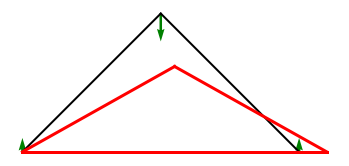

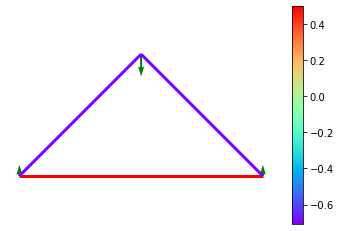

In [5]:
# create plots
model.plot(factor=2.)